C:\Users\danie\AppData\Local\Temp\ipykernel_22188\3013196976.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




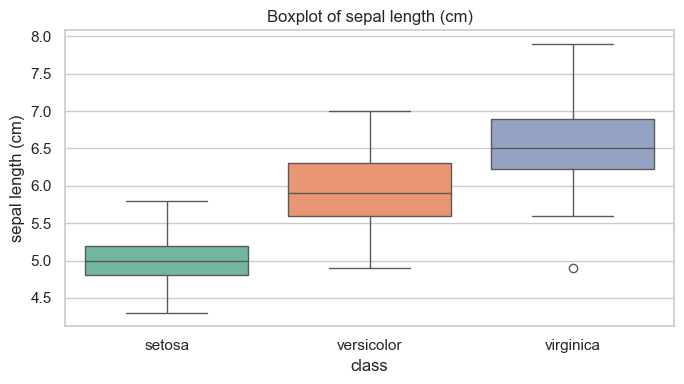

C:\Users\danie\AppData\Local\Temp\ipykernel_22188\3013196976.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




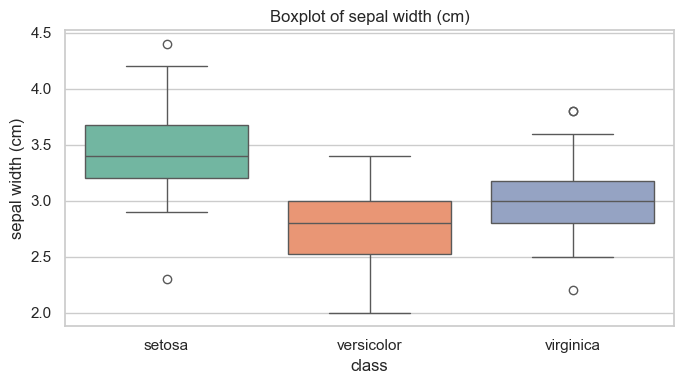

C:\Users\danie\AppData\Local\Temp\ipykernel_22188\3013196976.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




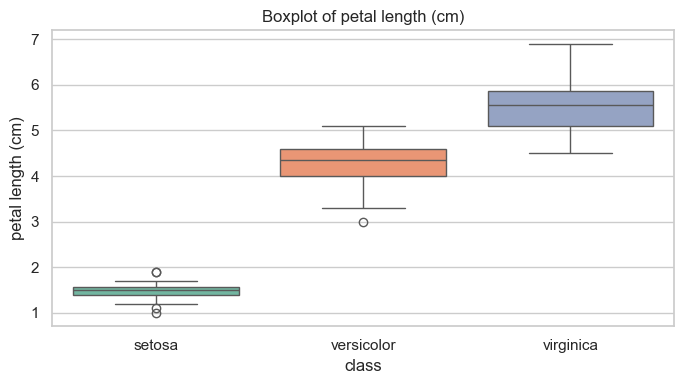

C:\Users\danie\AppData\Local\Temp\ipykernel_22188\3013196976.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




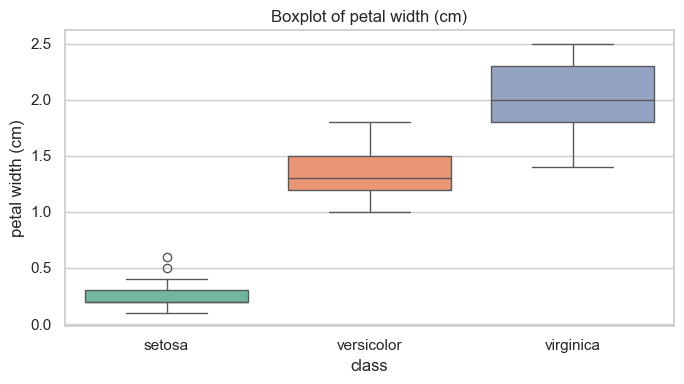

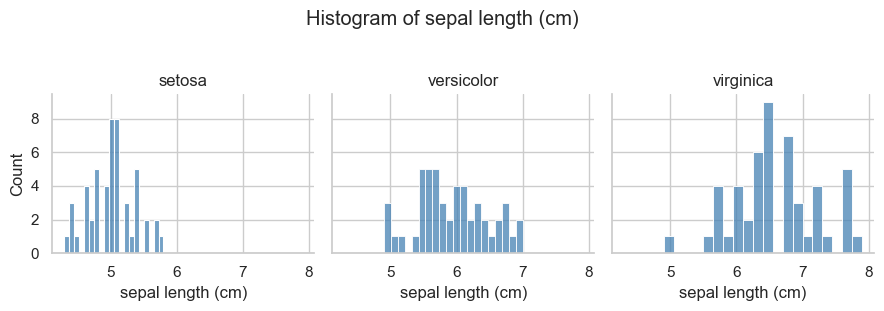

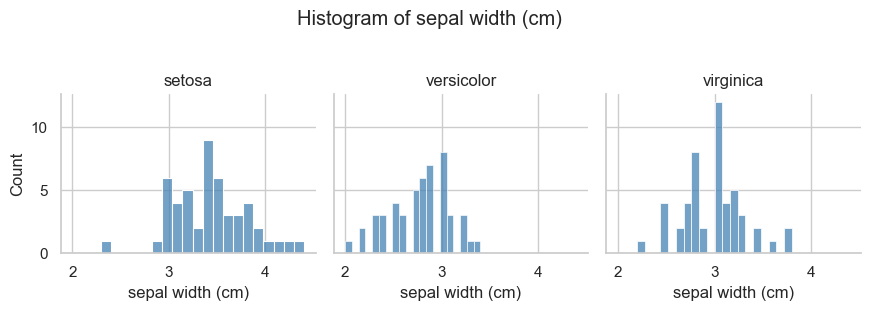

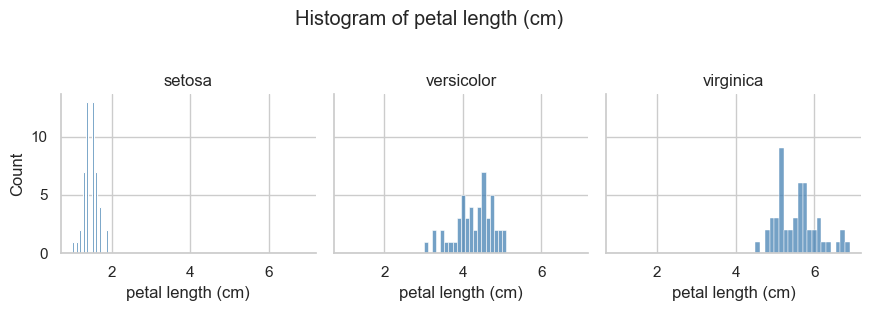

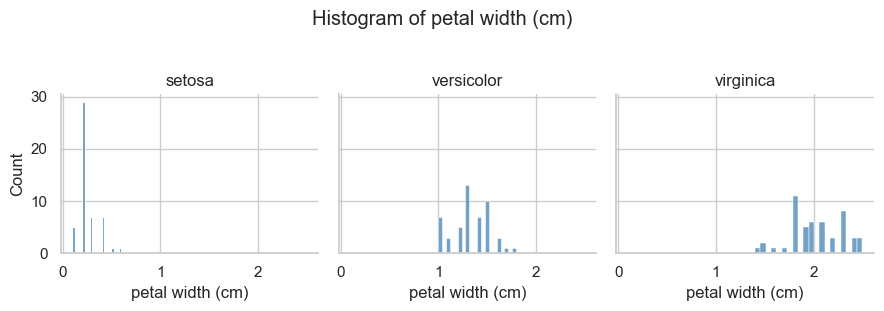

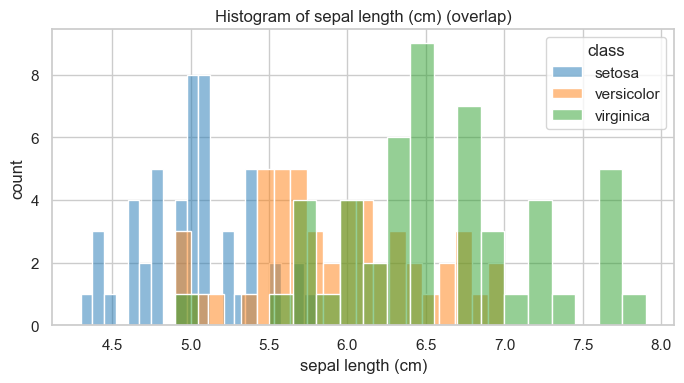

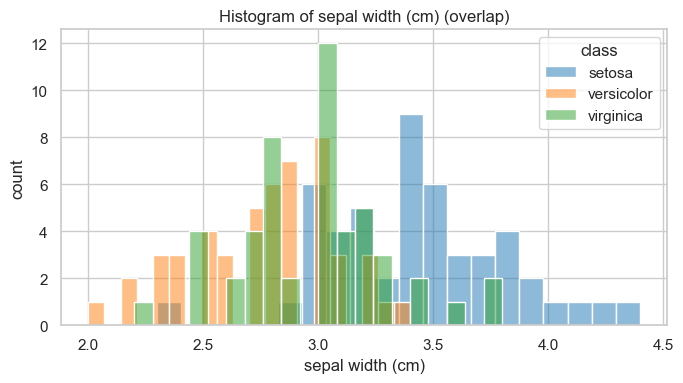

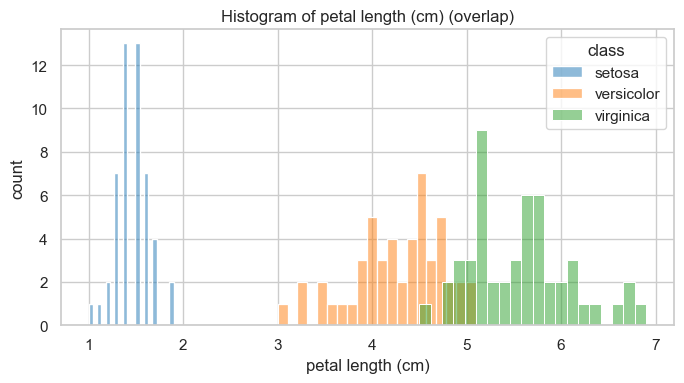

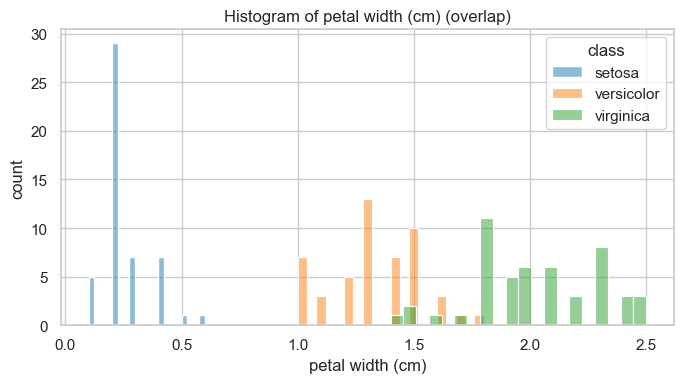

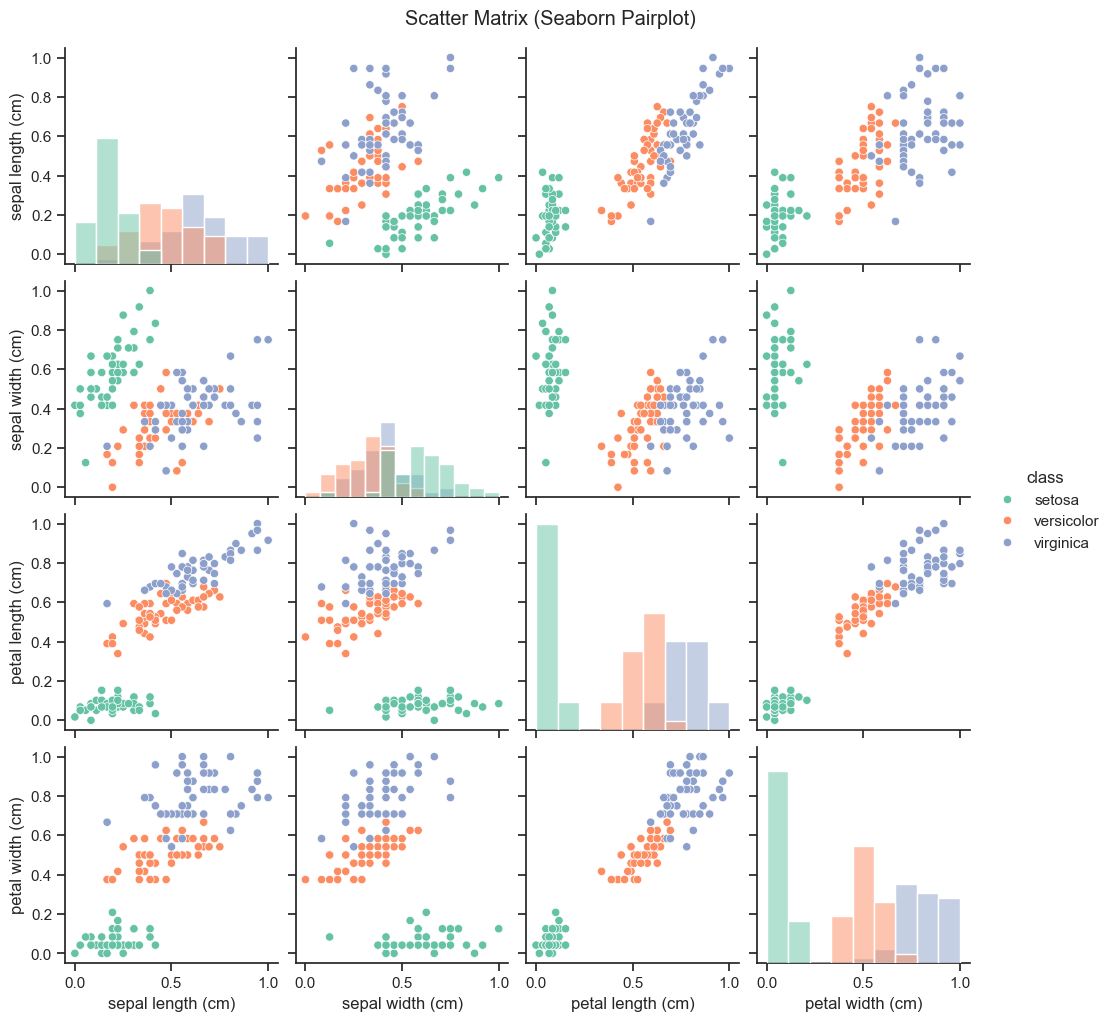

In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()

def label(x):
    labels = iris.target_names
    return labels[x]

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class_codes'] = iris.target
iris_df['class'] = iris_df['class_codes'].apply(label)

# configurações gerais de estilo
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (7, 4)

# 1) Boxplots por coluna (numéricas) coloridos por classe
num_cols = iris_df.select_dtypes(include='number').columns.tolist()
# Removendo a coluna de código de classe para gráficos de features
feature_cols = [c for c in num_cols if c != 'class_codes']

for c in feature_cols:
    plt.figure()
    sns.boxplot(data=iris_df, x='class', y=c, palette='Set2')
    plt.title(f'Boxplot of {c}')
    plt.xlabel('class')
    plt.ylabel(c)
    plt.tight_layout()
    plt.show()


for c in feature_cols:
    g = sns.FacetGrid(iris_df, col='class', sharex=True, sharey=True, height=3)
    g.map_dataframe(sns.histplot, x=c, bins=20, color='steelblue')
    g.set_titles(col_template="{col_name}")
    g.fig.suptitle(f'Histogram of {c}', y=1.03)
    plt.tight_layout()
    plt.show()

for c in feature_cols:
    plt.figure()
    for cls, color in zip(iris_df['class'].unique(), ['tab:blue', 'tab:orange', 'tab:green']):
        sns.histplot(
            data=iris_df[iris_df['class'] == cls],
            x=c, bins=20, kde=False, color=color, label=cls, alpha=0.5
        )
    plt.title(f'Histogram of {c} (overlap)')
    plt.xlabel(c)
    plt.ylabel('count')
    plt.legend(title='class')
    plt.tight_layout()
    plt.show()

num_columns = iris_df.select_dtypes(include='number')
to_standardize = num_columns.columns.tolist()
to_standardize.remove('class_codes')

scaler = MinMaxScaler((0, 1))
iris_df[to_standardize] = scaler.fit_transform(iris_df[to_standardize])

sns.set(style="ticks", context="notebook")
g = sns.pairplot(
    iris_df,
    vars=to_standardize,         # apenas features numéricas escaladas
    hue='class',
    palette='Set2',
    diag_kind='hist',
    corner=False
)
g.fig.suptitle('Scatter Matrix (Seaborn Pairplot)', y=1.02)
plt.show()